### SDSE Homework 1 — Raj Thimmareddy

In [43]:
# Dependencies

import numpy as np
import sympy as sy
import scipy.integrate as spi
import matplotlib.pyplot as plt
import math

#### Problem 1

In [3]:
# Initialize Sample Sets

ss_a = np.linspace(0, 1, 500)
ss_b = np.linspace(1, 500, 500) # Relative measure of infinity
ss_c = np.linspace(0, 500, 501) # Relative measure of infinity

In [4]:
# Generate pdf values

pdf_a = [(1/3) * (x**3) for x in ss_a]
pdf_b = [1/x for x in ss_b]
pdf_c = [2**-x for x in ss_c]

In [5]:
# Positivity Test Method

def positivity_test_d(ss, pdf, eq_name):
    plt.figure()
    plt.scatter(ss, pdf)
    plt.vlines(ss, ymin=0, ymax=pdf, alpha=0.4)

    plt.title(f'Probability Density Function of Equation {eq_name}')
    plt.xlabel('Events'); plt.ylabel('Probability')
    plt.grid(); plt.show()

def positivity_test_c(ss, pdf, eq_name):
    plt.figure()
    plt.plot(ss, pdf)

    plt.title(f'Probability Density Function of Equation {eq_name}')
    plt.xlabel('Events'); plt.ylabel('Probability')
    plt.grid(); plt.show()

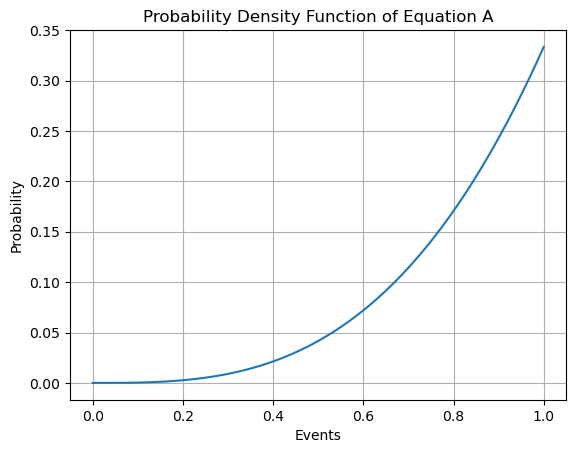

In [6]:
# Graphing and verifying positivity for: pdf_a

positivity_test_c(ss_a, pdf_a, 'A')

In [7]:
# Evaluating the integral over the sample set for: pdf_a

integral_a = spi.trapezoid(pdf_a, ss_a)
integral_a

0.0833336680040107

While **pdf_a** maintains positivity over the sample space, its integral over the sample space *does not* equal 1. As such, the pdf is **invalid** over the sample space

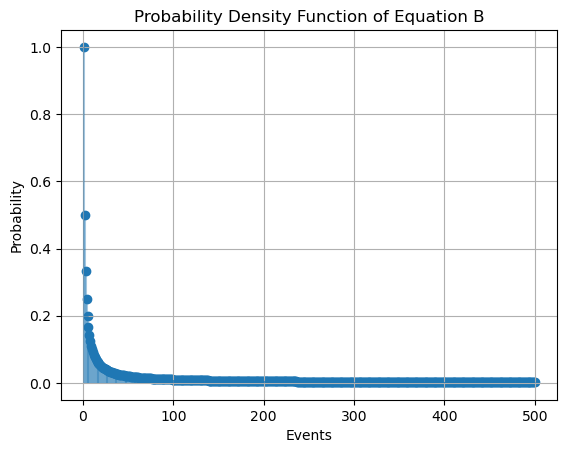

In [8]:
# Graphing and verifying positivity for: pdf_b

positivity_test_d(ss_b, pdf_b, 'B')

In [9]:
# Evaluating the integral over the sample set for: pdf_b

integral_b = 0
for probability in pdf_b:
    integral_b += probability
integral_b

6.79282342999052

While **pdf_b** maintains positivity over the sample space, its integral over the sample space *does not* equal 1, it seems to diverge to infinity. As such, the pdf is **invalid** over the sample space

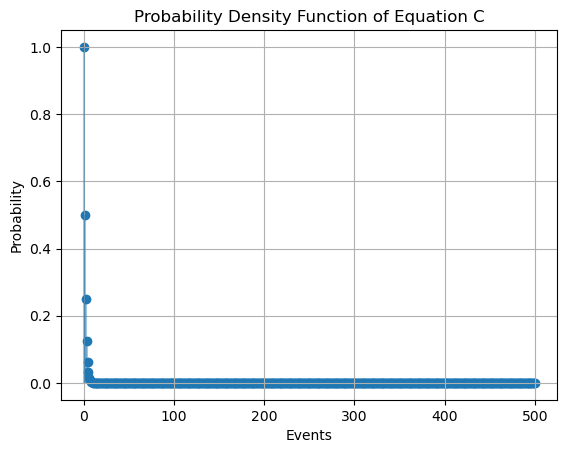

In [10]:
# Graphing and verifying positivity for: pdf_c

positivity_test_d(ss_c, pdf_c, 'C')

In [11]:
# Evaluating the integral over the sample set for: pdf_c

integral_c = 0
for probability in pdf_c:
    integral_c += probability
integral_c

2.0

While **pdf_c** maintains positivity over the sample space, its integral over the sample space *does not* equal 1; rather equals 2. As such, the pdf is **invalid** over the sample space

#### Problem 2

In [13]:
# Part (a)

# Added up the respective probabilities for given X values

$$
p_X(x) =
\begin{cases}
\frac{1}{4}, & x = 1 \\
\frac{3}{4}, & x = 2 \\
0, & \text{otherwise}
\end{cases}
$$

In [15]:
# Part (b)

# Sum of joint probabilities for given condition = (1/16) + (1/16) = 1/8
# Marginalized probability calculated for X being 1 = 1/4
# Conditional probability = (1/8) / (1/4) = 1/2 

In [23]:
# Part (c)

# For a discrete R.V., the expected value will be the summation of y * p(y), over the sample set
E_X = 1 * (1/4) + 2 * (3/4)
E_X

1.75

In [24]:
# Part (d)

Var_X = 1 * (1/4) + 4 * (3/4) - E_X**2
Var_X

0.1875

In [20]:
# Part (e)

# Likewise, E[Y] = 3 * (3/8) + 4 * (9/16) + 5 * (1/16)
E_Y = 3 * (3/8) + 4 * (9/16) + 5 * (1/16)
E_Y

3.6875

In [22]:
# Part (f)

# Likewise, E[Y**2] = 9 * (3/8) + 16 * (9/16) + 25 * (1/16)
Var_Y = (9 * (3/8) + 16 * (9/16) + 25 * (1/16)) - E_Y**2
Var_Y

0.33984375

In [29]:
# Part (g)

# Cov(X, Y) = E[(x - mu_x) * (y - mu_y)] = summation for s.s. of Z: (x - mu_x) * (y - mu_y) * p_z(x, y) 

ss_X = [1, 2]; ss_Y = [3, 4, 5]

p_XY = {
    (1, 3): 1/8, (1, 4): 1/16, (1, 5): 1/16,
    (2, 3): 1/4, (2, 4): 1/2, (2, 5): 0
}

Cov_XY = 0

for x in ss_X:
    for y in ss_Y:
        p_z = p_XY.get((x, y), 0)
        Cov_XY += (x - E_X) * (y - E_Y) * p_z

Cov_XY

-0.015625

#### Problem 3

In [47]:
# E[T] = E[A1 + ... + A10 + B1 + ... B15 + C1 + ... + C30]
# E[T] = E[A1] + ... + E[A10] + E[B1] + ... E[B15] + E[C1] + ... + E[C30]
# E[T] = 10 * E[A] + 15 * E[B] + 30 * E[C]

E_A = 0.2; E_B = 0.1; E_C = 0.05 # mm
E_T = 10 * E_A + 15 * E_B + 30 * E_C

print(f'Mean = {E_T}mm')

std_A = 4; std_B = 3; std_C = 0.5 # µm
std_T = np.sqrt(10 * std_A**2 + 15 * std_B**2 + 30 * std_C**2)

print(f'Standard Deviation = ±{round(std_T, 2)}µm')

Mean = 5.0mm
Standard Deviation = ±17.39µm


#### Problem 4

In [37]:
# Part (a)

lamb = 0.1
E_lifetime = 1/lamb
print(f'Mean Lifetime = {E_lifetime} years')

Mean Lifetime = 10.0 years


In [41]:
# Part (b)

# Mean of exponential distribution = std of exponential distribution
print(f'Standard Deviation = {E_lifetime} years')

Standard Deviation = 10.0 years


In [53]:
# Part (c)

def pdf_lifetime(dt):
    return lamb * math.e**(-lamb * dt)

dt = sy.Symbol('dt')
print(f'% of washers expected to fail within 10 years = {round(sy.integrate(pdf_lifetime(dt), (dt, 0, 10)) * 100, 2)}%')

% of washers expected to fail within 10 years = 63.21%


In [52]:
# Part (d)

p_t = sy.Symbol('p_t')
pdf_lifetime_eq = sy.solve(lamb * sy.exp(-lamb * dt) - p_t, dt)

median_life = pdf_lifetime_eq[0].subs(p_t, 0.05)
print(f'Median Life = {round(median_life, 2)} years')

Median Life = 6.93 years


In [55]:
# Part (e)

# P(T > t) = 1 - P(T < t)
print(f'{round((1 - sy.integrate(pdf_lifetime(dt), (dt, 0, 3))) * 100, 2)}% pass rate for the 5 independent washers, in the next 3 years')

74.08% pass rate for the 5 independent washers, in the next 3 years


In [56]:
# Part (f)

# Lifetimes are independent so will have to calculate their intersections

print(f'{round(sy.integrate(pdf_lifetime(dt), (dt, 0, 15))**5 * 100, 2)}% chance of all 5 machines failing within the next 15 years')

28.30% chance of all 5 machines failing within the next 15 years
